In [77]:
from networks import *
from simulation import *
from display import *
import numpy as np
from matplotlib import pyplot as plt
import thinkplot

%matplotlib inline

In [105]:
fb_g = load_graph('facebook_combined.txt.gz')
ba_g = gen_BA_graph(4039, 22)

In [21]:
print(fb_g.number_of_edges(), ba_g.number_of_edges())
print(fb_g.number_of_nodes(), ba_g.number_of_nodes())

88234 88374
4039 4039


In [37]:
print(np.mean(run_SIS_simulation(fb_g, 0.3, rho_0=None, time_steps=100)[10:]))
print(np.mean(run_SIS_simulation(ba_g, 0.3, rho_0=None, time_steps=100)[10:]))
# run_SIS_simulation(fb_g, 0.3, time_steps=1000)
# run_SIS_simulation(fb_g, 0.3, time_steps=2000)
# run_SIS_simulation(ba_g, 0.3, rho_0=None, time_steps=100)

0.214148166488
0.230587879288


In [ ]:
# Experiment 1

In [43]:
trials = 10

lambdas = np.linspace(1/8, 1/20, 10)
rhos = []

for lam in lambdas:
    print('starting lambda: ', lam)
    trial_rhos = []
    for trial in range(trials):
        trial_rhos.append(run_SIS_simulation(fb_g, lam, time_steps=20)[-1])
    rhos.append(np.mean(trial_rhos))

# lambdas_plan = {
#     1e5 : np.linspace(1/12, 1/8, 5),
#     5e5 : np.linspace(1/15, 1/10, 3),
#     1e6 : np.linspace(1/17, 1/12, 2),
#     5e6 : np.linspace(1/18, 1/15, 2),
#     8.5e6 : np.linspace(1/20, 1/19, 2),
# #     8.5e6 : [1/20]
# }

# data = {}
# for size in lambdas_plan.keys():
#     print('starting size: ', size)
#     for lam in lambdas_plan[size]:
#         print('\tstarting lamda: ', lam)
#         data[(size, lam)] = []
#         for trial in range(10):
# #             print('t', trial)
#             data[(size, lam)].append(run_SIS_simulation(g, lam, time_steps=20)[-1])
#         data[(size, lam)] = np.mean(data[(size, lam)])
rhos

starting lambda:  0.125
starting lambda:  0.116666666667
starting lambda:  0.108333333333
starting lambda:  0.1
starting lambda:  0.0916666666667
starting lambda:  0.0833333333333
starting lambda:  0.075
starting lambda:  0.0666666666667
starting lambda:  0.0583333333333
starting lambda:  0.05


[0.087422629363703888,
 0.079772220846744249,
 0.074127259222579858,
 0.067962366922505568,
 0.059569200297103241,
 0.0525377568705125,
 0.045258727407774202,
 0.037459767269126018,
 0.030230255013617237,
 0.022678880911116611]

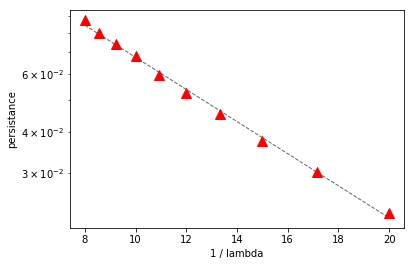

In [55]:
a, c = np.polyfit(1/lambdas, np.log(rhos), 1)
fit_xs = np.linspace(8, 20, 100)
fit_ys = np.exp(a * fit_xs + c)
thinkplot.plot(fit_xs, fit_ys, style='--', linewidth=1, color=(.4,.4,.4), alpha=1.0)


# plot a 
shapes = ['o', '+', 's', 'x', 'v', '.']
colors = [(1., 0., 0.), (1., .5, 0.), (.5, 1., 0.), (0., 1., 0.), (0., .9, .9)]

thinkplot.plot(1/lambdas, rhos, style='^', color=colors[0], markersize=10, alpha=1.0)
thinkplot.config(yscale='log', xlabel='1 / lambda', ylabel='persistance')

plt.savefig('fb_fig1.pdf')

In [106]:
fb_degrees = [fb_g.degree(n) for n in fb_g.nodes()]
ba_degrees = [ba_g.degree(n) for n in fb_g.nodes()]

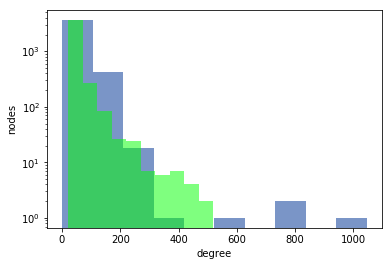

In [117]:
plt.hist(fb_degrees, color=(.26, .41, .69, .7))
plt.hist(ba_degrees, color=(0, 1, 0, .5))
plt.yscale('log')
plt.xlabel('degree')
plt.ylabel('nodes')
plt.title('')
# plt.xscale('log')
# plt.ylim(0, 5000)